In [3]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from datasets import load_dataset

In [4]:
# load dataset 
dataset = load_dataset('DBD-research-group/BirdSet', 'HSN', trust_remote_code=True)

Generating train split: 5460 examples [01:09, 78.74 examples/s] 
Generating test split: 10296 examples [00:05, 1737.55 examples/s]
Generating test_5s split: 12000 examples [00:26, 446.41 examples/s]


In [29]:
for feature in dataset['train'].features:
    print(feature)

audio
filepath
start_time
end_time
low_freq
high_freq
ebird_code
ebird_code_multilabel
ebird_code_secondary
call_type
sex
lat
long
length
microphone
license
source
local_time
detected_events
event_cluster
peaks
quality
recordist


### data & samplerate

`data`: This is a NumPy array that contains the audio samples from the file. The array shape depends on whether the audio is mono or stereo (or multi-channel). For mono audio, it will be a one-dimensional array, while for stereo audio, it will be a two-dimensional array with the shape `(num_samples, num_channels)`

`samplerate`: This is an integer that represents the sample rate of the audio file, typically given in Hertz (Hz). It indicates how many samples per second the audio signal contains.

#### Try to read Audio files

In [43]:
audio_file_path = dataset['train'][0]['filepath']
data, samplerate = sf.read(audio_file_path)

#### Display basic information about the audio file

In [44]:
print(f"Audio Data Shape: {data.shape}")
print(f"Sample Rate: {samplerate} Hz")

Audio Data Shape: (934934,)
Sample Rate: 32000 Hz


#### Playback Audio

In [45]:
import sounddevice as sd

# Play the audio
sd.play(data, samplerate)

# Wait until playback is finished
sd.wait()


#### Visualize the Audio Signal

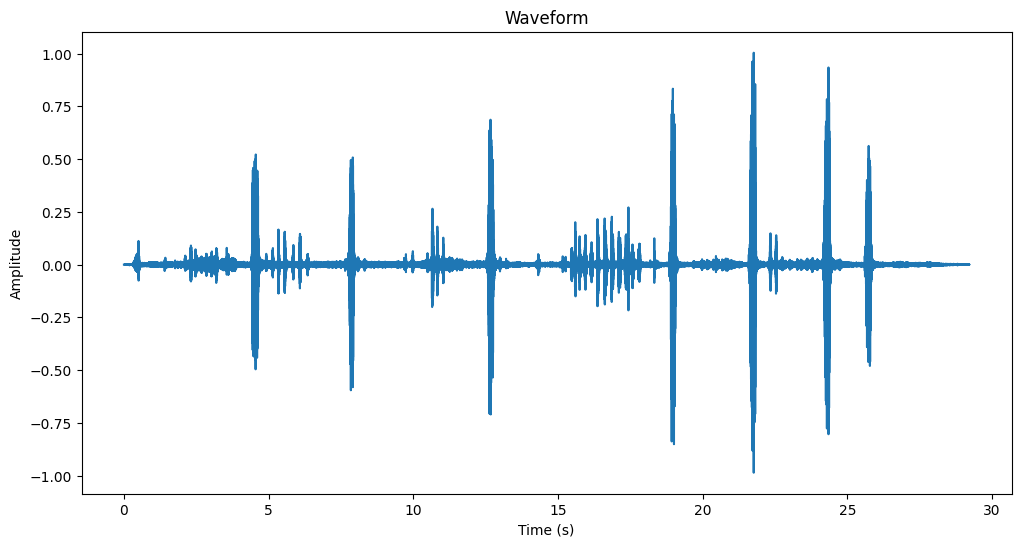

In [35]:
# Create a time array in seconds
time = np.linspace(0, len(data) / samplerate, num=len(data))

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(time, data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

#### Compute and Plot the Spectrogram

* A spectrogram provides a visual representation of the frequency spectrum over time

 the variable `D` represents the magnitude of the Short-Time Fourier Transform (STFT) of the audio signal. 

 **Short-Time Fourier Transform (STFT)**: The STFT is a fundamental tool in signal processing used to analyze the frequency content of a signal over time. It works by dividing a signal into overlapping segments (or windows) and then applying the Fourier Transform to each segment. This results in a time-frequency representation of the signal, which can be used to create a spectrogram.

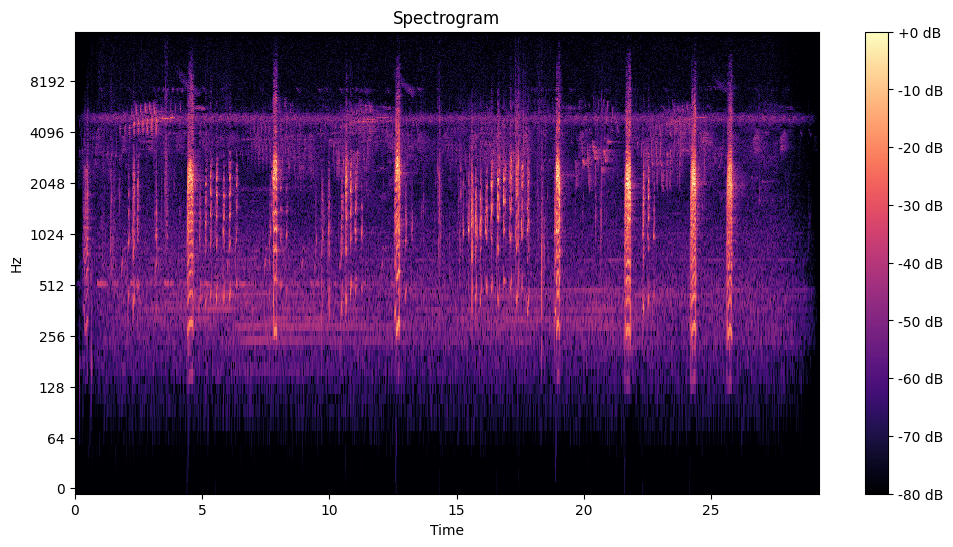

In [38]:
import librosa.display

# Compute the Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(data.T, n_fft=2048, hop_length=512))

# Convert the amplitude to decibels
D_db = librosa.amplitude_to_db(D, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(D_db, sr=samplerate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

#### Extract Audio Features:

such as MFCCs (Mel-Frequency Cepstral Coefficients) for audio analysis

**MFCCs**: MFCCs are widely used because they provide a robust representation of audio signals by mimicking the human auditory system. They focus on the spectral envelope of the audio signal, which is crucial for tasks like speech recognition and music genre classification.

also, The y-axis of an MFCC plot represents the individual Mel-Frequency Cepstral Coefficients, which are key features used to analyze and interpret audio signals. Understanding the role of each coefficient allows for better analysis of audio data in various applications, from speech recognition to music information retrieval.

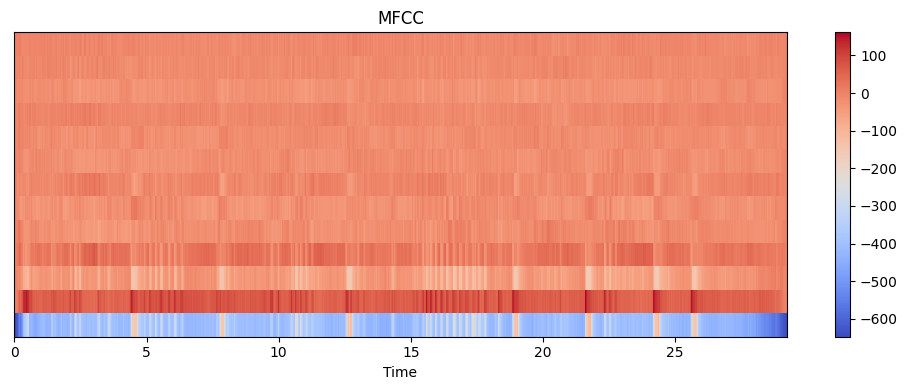

In [39]:
import librosa

# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=data.T, sr=samplerate, n_mfcc=13)

# Display MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=samplerate)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


#### resample the audio data to a different sample rate

In [46]:
# Resample to a new sample rate (e.g., 16 kHz)
new_samplerate = 16000
data_resampled = librosa.resample(data.T, orig_sr=samplerate, target_sr=new_samplerate)

# Check the new shape and sample rate
print(f"Resampled Audio Data Shape: {data_resampled.shape}")
print(f"New Sample Rate: {new_samplerate} Hz")

Resampled Audio Data Shape: (467467,)
New Sample Rate: 16000 Hz


#### Save the Processed Audio

In [47]:
# Save the resampled audio to a new file
sf.write('output_audio.wav', data_resampled.T, new_samplerate)

#### play the modified

In [48]:
# Play the audio
sd.play(data_resampled, samplerate)

# Wait until playback is finished
sd.wait()